## <font color="maroon"><h4 align="center">Handling Missing Data - fillna, interpolate, dropna</font>

In [67]:
#data cleaning/data munging
import pandas as pd
df = pd.read_csv("weather_data_missing.csv")
#df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])
#type(df.day[0])
df


,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,3.0,45.0,NaN


In [102]:
df.set_index('day',inplace=True)
df.loc["01-07-2017"]
df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 01-01-2017 to nan
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          11 non-null     int64  
 1   temperature    6 non-null      float64
 2   windspeed      6 non-null      float64
 3   event          7 non-null      object 
 4   temperature f  6 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 828.0+ bytes


In [73]:
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,01-01-2017,32.0,6.0,Rain
1,01-04-2017,NaN,9.0,Sunny
2,01-05-2017,28.0,NaN,Snow
3,01-06-2017,NaN,7.0,NaN
4,01-07-2017,32.0,NaN,Rain
5,01-08-2017,NaN,NaN,Sunny
6,01-09-2017,NaN,NaN,NaN
7,01-10-2017,34.0,8.0,Cloudy
8,01-11-2017,40.0,12.0,Sunny
9,01-11-2017,3.0,45.0,NaN


In [74]:
df.isnull()
df.info

<bound method DataFrame.info of            day  temperature  windspeed   event
0   01-01-2017         32.0        6.0    Rain
1   01-04-2017          NaN        9.0   Sunny
2   01-05-2017         28.0        NaN    Snow
3   01-06-2017          NaN        7.0     NaN
4   01-07-2017         32.0        NaN    Rain
5   01-08-2017          NaN        NaN   Sunny
6   01-09-2017          NaN        NaN     NaN
7   01-10-2017         34.0        8.0  Cloudy
8   01-11-2017         40.0       12.0   Sunny
9   01-11-2017          3.0       45.0     NaN
10         NaN          NaN        NaN     NaN>

<Axes: ylabel='day'>

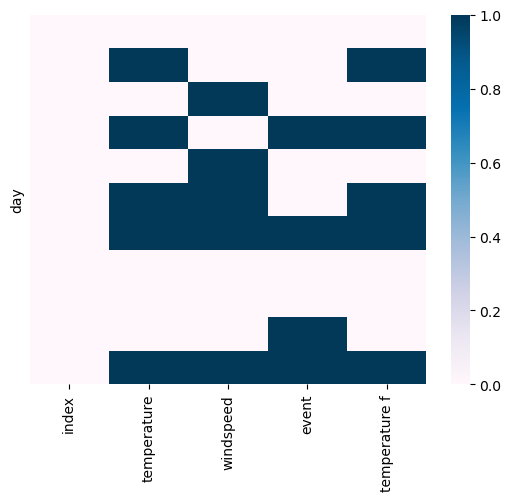

In [121]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap="PuBu")
#sns.color_palette("rocket", as_cmap=True)
#sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")

In [78]:
#df.reset_index('day',inplace=True)
df.reset_index(inplace=True)
df
#df.info()


,index,day,temperature,windspeed,event
0,0,01-01-2017,32.0,6.0,Rain
1,1,01-04-2017,NaN,9.0,Sunny
2,2,01-05-2017,28.0,NaN,Snow
3,3,01-06-2017,NaN,7.0,NaN
4,4,01-07-2017,32.0,NaN,Rain
5,5,01-08-2017,NaN,NaN,Sunny
6,6,01-09-2017,NaN,NaN,NaN
7,7,01-10-2017,34.0,8.0,Cloudy
8,8,01-11-2017,40.0,12.0,Sunny
9,9,01-11-2017,3.0,45.0,NaN


## <font color="blue">fillna</font>

<font color="purple">**Fill all NaN with one specific value**</font>

In [79]:
#thresh= 2 Require that minimum 2 non-NA values.
#new_df=df.dropna(thresh=2)
new_df = df.fillna(0)
print(new_df)
new_df.info()

    index         day  temperature  windspeed   event
0       0  01-01-2017         32.0        6.0    Rain
1       1  01-04-2017          0.0        9.0   Sunny
2       2  01-05-2017         28.0        0.0    Snow
3       3  01-06-2017          0.0        7.0       0
4       4  01-07-2017         32.0        0.0    Rain
5       5  01-08-2017          0.0        0.0   Sunny
6       6  01-09-2017          0.0        0.0       0
7       7  01-10-2017         34.0        8.0  Cloudy
8       8  01-11-2017         40.0       12.0   Sunny
9       9  01-11-2017          3.0       45.0       0
10     10           0          0.0        0.0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        11 non-null     int64  
 1   day          11 non-null     object 
 2   temperature  11 non-null     float64
 3   windspeed    11 non-null     float6

<font color="purple">**Fill na using column names and dict**</font>

In [80]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 1,
        'event': 'No Event'
    })
new_df

,index,day,temperature,windspeed,event
0,0,01-01-2017,32.0,6.0,Rain
1,1,01-04-2017,0.0,9.0,Sunny
2,2,01-05-2017,28.0,1.0,Snow
3,3,01-06-2017,0.0,7.0,No Event
4,4,01-07-2017,32.0,1.0,Rain
5,5,01-08-2017,0.0,1.0,Sunny
6,6,01-09-2017,0.0,1.0,No Event
7,7,01-10-2017,34.0,8.0,Cloudy
8,8,01-11-2017,40.0,12.0,Sunny
9,9,01-11-2017,3.0,45.0,No Event


In [95]:
new_df=df.copy()
new_df['temperature'].fillna(new_df['temperature'].mean(),inplace=True)
new_df['windspeed'].fillna(new_df['windspeed'].mean(),inplace=True)
new_df

,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.000000,6.0,Rain,52.0
1,1,01-04-2017,28.166667,9.0,Sunny,NaN
2,2,01-05-2017,28.000000,14.5,Snow,38.0
3,3,01-06-2017,28.166667,7.0,NaN,NaN
4,4,01-07-2017,32.000000,14.5,Rain,52.0
5,5,01-08-2017,28.166667,14.5,Sunny,NaN
6,6,01-09-2017,28.166667,14.5,NaN,NaN
7,7,01-10-2017,34.000000,8.0,Cloudy,54.0
8,8,01-11-2017,40.000000,12.0,Sunny,70.0
9,9,01-11-2017,3.000000,45.0,NaN,13.0


<font color="purple">**Use method to determine how to fill na values**</font>

In [98]:
df
new_df = df.fillna(method="ffill") #forward fill
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\3533506372.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="ffill") #forward fill


,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.0,6.0,Rain,52.0
1,1,01-04-2017,32.0,9.0,Sunny,52.0
2,2,01-05-2017,28.0,9.0,Snow,38.0
3,3,01-06-2017,28.0,7.0,Snow,38.0
4,4,01-07-2017,32.0,7.0,Rain,52.0
5,5,01-08-2017,32.0,7.0,Sunny,52.0
6,6,01-09-2017,32.0,7.0,Sunny,52.0
7,7,01-10-2017,34.0,8.0,Cloudy,54.0
8,8,01-11-2017,40.0,12.0,Sunny,70.0
9,9,01-11-2017,3.0,45.0,Sunny,13.0


In [83]:
#ffill on specific column
new_df=df.loc[:,'windspeed'].ffill()
new_df


0      6.0
1      9.0
2      9.0
3      7.0
4      7.0
5      7.0
6      7.0
7      8.0
8     12.0
9     45.0
10    45.0
Name: windspeed, dtype: float64

In [84]:
new_df = df.fillna(method="bfill")
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\200175317.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="bfill")


,index,day,temperature,windspeed,event
0,0,01-01-2017,32.0,6.0,Rain
1,1,01-04-2017,28.0,9.0,Sunny
2,2,01-05-2017,28.0,7.0,Snow
3,3,01-06-2017,32.0,7.0,Rain
4,4,01-07-2017,32.0,8.0,Rain
5,5,01-08-2017,34.0,8.0,Sunny
6,6,01-09-2017,34.0,8.0,Cloudy
7,7,01-10-2017,34.0,8.0,Cloudy
8,8,01-11-2017,40.0,12.0,Sunny
9,9,01-11-2017,3.0,45.0,NaN


<font color="purple">**Use of axis**</font>

In [85]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\3318019960.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"


,index,day,temperature,windspeed,event
0,0,01-01-2017,32.0,6.0,Rain
1,1,01-04-2017,9.0,9.0,Sunny
2,2,01-05-2017,28.0,Snow,Snow
3,3,01-06-2017,7.0,7.0,NaN
4,4,01-07-2017,32.0,Rain,Rain
5,5,01-08-2017,Sunny,Sunny,Sunny
6,6,01-09-2017,NaN,NaN,NaN
7,7,01-10-2017,34.0,8.0,Cloudy
8,8,01-11-2017,40.0,12.0,Sunny
9,9,01-11-2017,3.0,45.0,NaN


<font color="purple">**limit parameter**</font>

In [86]:
#limit will specify how many values should get replace
new_df = df.fillna(method="ffill",limit=2)
#new_df = df.fillna(method="ffill")
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\2472552054.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = df.fillna(method="ffill",limit=2)


,index,day,temperature,windspeed,event
0,0,01-01-2017,32.0,6.0,Rain
1,1,01-04-2017,32.0,9.0,Sunny
2,2,01-05-2017,28.0,9.0,Snow
3,3,01-06-2017,28.0,7.0,Snow
4,4,01-07-2017,32.0,7.0,Rain
5,5,01-08-2017,32.0,7.0,Sunny
6,6,01-09-2017,32.0,NaN,Sunny
7,7,01-10-2017,34.0,8.0,Cloudy
8,8,01-11-2017,40.0,12.0,Sunny
9,9,01-11-2017,3.0,45.0,Sunny


### <font color="blue">interpolate</font>

In [87]:
new_df = df.interpolate()
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\812076388.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  new_df = df.interpolate()


,index,day,temperature,windspeed,event
0,0,01-01-2017,32.000000,6.00,Rain
1,1,01-04-2017,30.000000,9.00,Sunny
2,2,01-05-2017,28.000000,8.00,Snow
3,3,01-06-2017,30.000000,7.00,NaN
4,4,01-07-2017,32.000000,7.25,Rain
5,5,01-08-2017,32.666667,7.50,Sunny
6,6,01-09-2017,33.333333,7.75,NaN
7,7,01-10-2017,34.000000,8.00,Cloudy
8,8,01-11-2017,40.000000,12.00,Sunny
9,9,01-11-2017,3.000000,45.00,NaN


In [129]:
new_df = df.interpolate() 
new_df

C:\Users\dai\AppData\Local\Temp\ipykernel_17816\1830341667.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  new_df = df.interpolate()


,index,temperature,windspeed,event,temperature f
day,,,,,
01-01-2017,0,32.000000,6.00,Rain,42.000000
01-04-2017,1,30.000000,9.00,Sunny,40.000000
01-05-2017,2,28.000000,8.00,Snow,38.000000
01-06-2017,3,30.000000,7.00,NaN,40.000000
01-07-2017,4,32.000000,7.25,Rain,42.000000
01-08-2017,5,32.666667,7.50,Sunny,42.666667
01-09-2017,6,33.333333,7.75,NaN,43.333333
01-10-2017,7,34.000000,8.00,Cloudy,44.000000
01-11-2017,8,40.000000,12.00,Sunny,50.000000


In [100]:

df['temperature f']=df['temperature'].map(lambda x:x+10)
df




,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.0,6.0,Rain,42.0
1,1,01-04-2017,NaN,9.0,Sunny,NaN
2,2,01-05-2017,28.0,NaN,Snow,38.0
3,3,01-06-2017,NaN,7.0,NaN,NaN
4,4,01-07-2017,32.0,NaN,Rain,42.0
5,5,01-08-2017,NaN,NaN,Sunny,NaN
6,6,01-09-2017,NaN,NaN,NaN,NaN
7,7,01-10-2017,34.0,8.0,Cloudy,44.0
8,8,01-11-2017,40.0,12.0,Sunny,50.0
9,9,01-11-2017,3.0,45.0,NaN,13.0


In [90]:
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df

,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.0,6.0,Rain,52.0
1,1,01-04-2017,NaN,9.0,Sunny,NaN
2,2,01-05-2017,28.0,NaN,Snow,38.0
3,3,01-06-2017,NaN,7.0,NaN,NaN
4,4,01-07-2017,32.0,NaN,Rain,52.0
5,5,01-08-2017,NaN,NaN,Sunny,NaN
6,6,01-09-2017,NaN,NaN,NaN,NaN
7,7,01-10-2017,34.0,8.0,Cloudy,54.0
8,8,01-11-2017,40.0,12.0,Sunny,70.0
9,9,01-11-2017,3.0,45.0,NaN,13.0


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

### <font color="blue">dropna</font>

In [91]:
new_df = df.dropna()    
new_df

,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.0,6.0,Rain,52.0
7,7,01-10-2017,34.0,8.0,Cloudy,54.0
8,8,01-11-2017,40.0,12.0,Sunny,70.0


In [92]:
new_df =df.dropna(how='all')
new_df

,index,day,temperature,windspeed,event,temperature f
0,0,01-01-2017,32.0,6.0,Rain,52.0
1,1,01-04-2017,NaN,9.0,Sunny,NaN
2,2,01-05-2017,28.0,NaN,Snow,38.0
3,3,01-06-2017,NaN,7.0,NaN,NaN
4,4,01-07-2017,32.0,NaN,Rain,52.0
5,5,01-08-2017,NaN,NaN,Sunny,NaN
6,6,01-09-2017,NaN,NaN,NaN,NaN
7,7,01-10-2017,34.0,8.0,Cloudy,54.0
8,8,01-11-2017,40.0,12.0,Sunny,70.0
9,9,01-11-2017,3.0,45.0,NaN,13.0


In [128]:
new_df = df.dropna(thresh=2)
new_df
#less that 2 not null values
  

,index,temperature,windspeed,event,temperature f
day,,,,,
01-01-2017,0,32.0,6.0,Rain,42.0
01-04-2017,1,NaN,9.0,Sunny,NaN
01-05-2017,2,28.0,NaN,Snow,38.0
01-06-2017,3,NaN,7.0,NaN,NaN
01-07-2017,4,32.0,NaN,Rain,42.0
01-08-2017,5,NaN,NaN,Sunny,NaN
01-10-2017,7,34.0,8.0,Cloudy,44.0
01-11-2017,8,40.0,12.0,Sunny,50.0
01-11-2017,9,3.0,45.0,NaN,13.0


### <font color="blue">Inserting Missing Dates</font>

In [94]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,index,day,temperature,windspeed,event,temperature f
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN


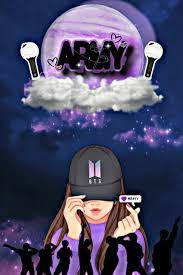
